In [3]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
raw_df = pd.read_csv('Data/fabrizioromanoherewego.csv')

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        120 non-null    int64  
 1   text                           120 non-null    object 
 2   post_text                      120 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           120 non-null    object 
 6   timestamp                      120 non-null    int64  
 7   image                          114 non-null    object 
 8   image_lowquality               120 non-null    object 
 9   images                         120 non-null    object 
 10  images_description             120 non-null    object 
 11  images_lowquality              120 non-null    object 
 12  images_lowquality_description  120 non-null    obj

In [7]:
raw_df.describe()

,post_id,shared_text,original_text,timestamp,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_watches,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,reaction_count,page_id,sharers,image_id
count,1.200000e+02,0.0,0.0,1.200000e+02,0.0,0.0,3.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.000000,1.200000e+02,0.0,1.130000e+02
mean,9.505735e+14,NaN,NaN,1.701115e+09,NaN,NaN,7.595873e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59203.091667,1.145898e+14,NaN,9.505516e+14
std,7.866216e+11,NaN,NaN,1.113913e+05,NaN,NaN,4.110669e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60706.913514,0.000000e+00,NaN,7.810976e+11
min,9.493145e+14,NaN,NaN,1.700927e+09,NaN,NaN,3.734852e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5458.000000,1.145898e+14,NaN,9.493145e+14
25%,9.498830e+14,NaN,NaN,1.701017e+09,NaN,NaN,5.435107e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29069.250000,1.145898e+14,NaN,9.498794e+14
50%,9.504762e+14,NaN,NaN,1.701102e+09,NaN,NaN,7.135362e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39501.500000,1.145898e+14,NaN,9.504491e+14
75%,9.512522e+14,NaN,NaN,1.701207e+09,NaN,NaN,9.526384e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61289.250000,1.145898e+14,NaN,9.512127e+14
max,9.521348e+14,NaN,NaN,1.701333e+09,NaN,NaN,1.191741e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,484000.000000,1.145898e+14,NaN,9.521348e+14


In [8]:
raw_df.tail(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
115,949353396992152,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,NaN,NaN,2023-11-26 00:05:35,1700931935,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,NaN,NaN,42000,NaN,114589756608819,NaN,9.493534e+14,['949353370325488'],False,NaN
116,949335846993907,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,NaN,NaN,2023-11-25 23:28:44,1700929724,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,87000,NaN,114589756608819,NaN,9.493358e+14,['949335800327245'],False,NaN
117,949333873660771,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,NaN,NaN,2023-11-25 23:24:41,1700929481,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,NaN,NaN,39000,NaN,114589756608819,NaN,9.493338e+14,['949333826994109'],False,NaN
118,949329466994545,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,NaN,NaN,2023-11-25 23:15:28,1700928928,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,NaN,NaN,30000,NaN,114589756608819,NaN,9.493295e+14,['949329450327880'],False,NaN
119,949314523662706,🚨🔴 Klopp: “We lost Diogo Jota with a muscle bu...,🚨🔴 Klopp: “We lost Diogo Jota with a muscle bu...,NaN,NaN,2023-11-25 22:43:00,1700926980,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,38000,NaN,114589756608819,NaN,9.493145e+14,['949314503662708'],False,NaN


In [9]:
raw_df['time'] = pd.to_datetime(raw_df['time'])

In [10]:
df = raw_df[['time','timestamp' ,'reaction_count']]
df

,time,timestamp,reaction_count
0,2023-11-30 15:30:55,1701333055,5458
1,2023-11-30 14:30:21,1701329421,29110
2,2023-11-30 08:23:21,1701307401,35794
3,2023-11-30 05:27:09,1701296829,95055
4,2023-11-30 05:00:00,1701295200,59112
...,...,...,...
115,2023-11-26 00:05:35,1700931935,42000
116,2023-11-25 23:28:44,1700929724,87000
117,2023-11-25 23:24:41,1700929481,39000
118,2023-11-25 23:15:28,1700928928,30000


In [11]:
pip install --upgrade pandas

In [12]:
import pandas as pd

df['time'] = pd.to_datetime(df['time'])

df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time

df = df[::-1].reset_index(drop=True)

df_datetime = df[['date', 'time']].copy()

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10728\989359527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10728\989359527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['time'].dt.date
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10728\989359527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [13]:
df_datetime

,date,time
0,2023-11-25,22:43:00
1,2023-11-25,23:15:28
2,2023-11-25,23:24:41
3,2023-11-25,23:28:44
4,2023-11-26,00:05:35
...,...,...
115,2023-11-30,05:00:00
116,2023-11-30,05:27:09
117,2023-11-30,08:23:21
118,2023-11-30,14:30:21


TypeError: float() argument must be a string or a real number, not 'datetime.time'

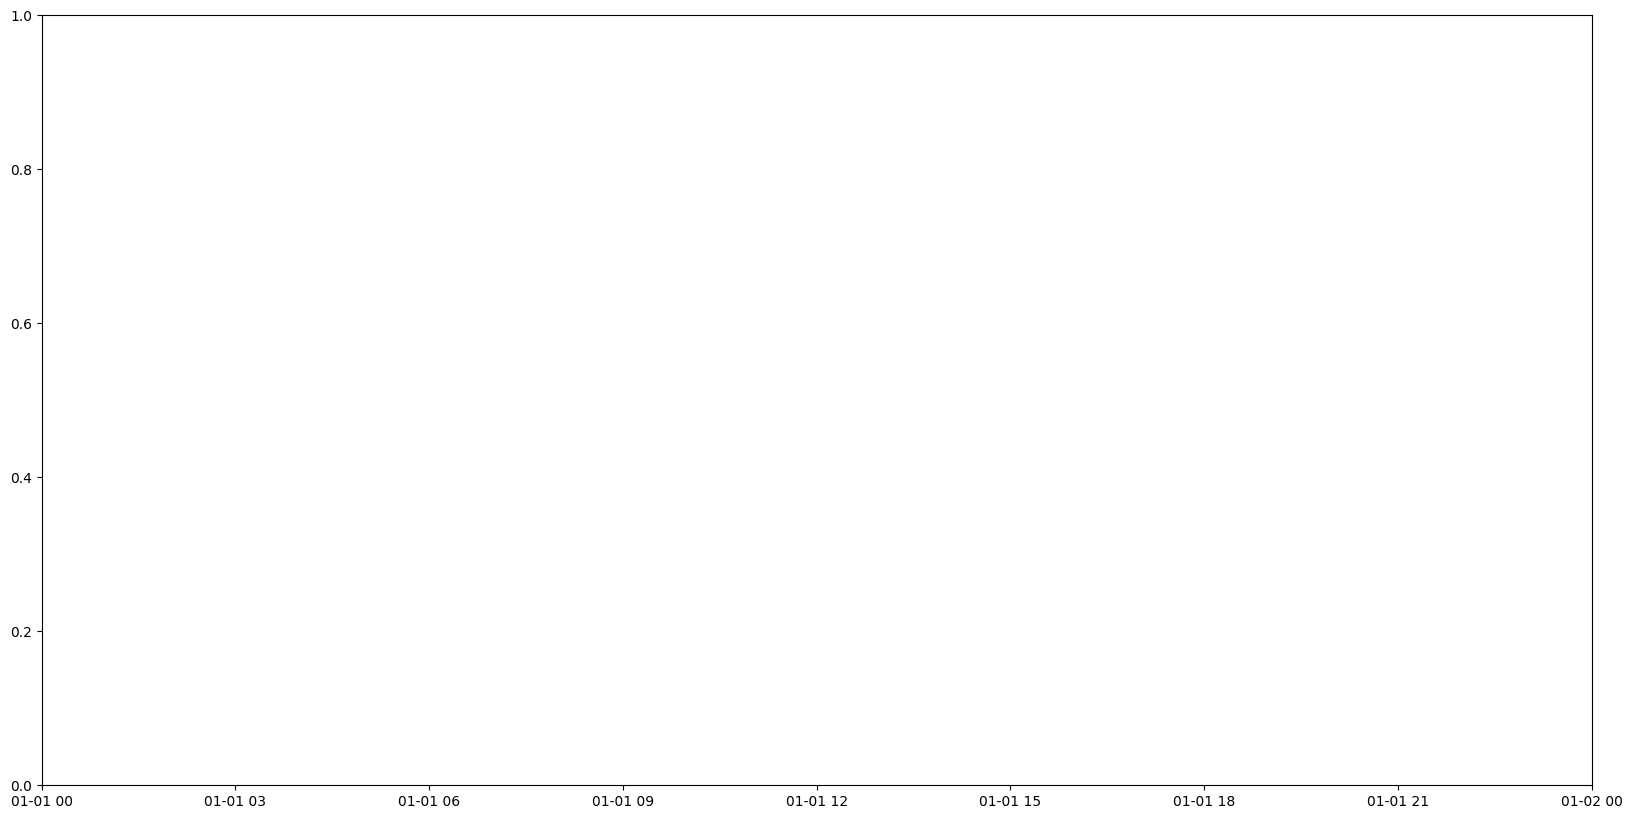

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
x1 = list(df_datetime['date'])
y1 = list(df_datetime['time'])
plt.plot(x1, y1, c = 'r')
ax.set_xticks(np.arange(0, 15*5, 15))
ax.set_yticks(np.arange(0, 15*5, 15))
plt.show()
x1

In [15]:
raw_df[['post_id', 'reactions']].head(10)

,post_id,reactions
0,952134820047343,"{'like': 4592, 'love': 776, 'haha': 25, 'wow':..."
1,952112546716237,"{'like': 21995, 'love': 6480, 'haha': 119, 'wo..."
2,951976760063149,"{'like': 25947, 'love': 689, 'haha': 8586, 'wo..."
3,951909296736562,"{'like': 71563, 'love': 21626, 'haha': 154, 'w..."
4,951897683404390,"{'like': 49187, 'love': 9093, 'haha': 83, 'wow..."
5,951869110073914,"{'like': 155731, 'love': 47615, 'haha': 279, '..."
6,951818136745678,"{'like': 61611, 'love': 12683, 'haha': 69, 'wo..."
7,951806140080211,"{'like': 19981, 'love': 1279, 'haha': 21, 'wow..."
8,951790760081749,"{'like': 48025, 'love': 7393, 'haha': 528, 'wo..."
9,951787750082050,"{'like': 114339, 'love': 27384, 'haha': 983, '..."


In [23]:
raw_df['reactions'] = raw_df['reactions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_reactions = raw_df['reactions'].apply(pd.Series)
df_reactions.head()


,like,love,haha,wow,care,angry,sad,0
0,4592.0,776.0,25.0,8.0,57.0,NaN,NaN,NaN
1,21995.0,6480.0,119.0,15.0,500.0,1.0,NaN,NaN
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,NaN
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,NaN
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,NaN


In [24]:
df_reactions = df_reactions.drop(df_reactions.columns[-1], axis=1)

for column in df_reactions.columns:
    df_reactions[column].fillna(df_reactions[column].median(), inplace=True)

df_reactions.head()

,like,love,haha,wow,care,angry,sad
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0


In [25]:
df_reactions = pd.concat([raw_df, df_reactions], axis=1).drop('reactions', axis=1)
df_reactions[['post_text','like','love','haha','wow','care','angry','sad',
                                 'shares','comments','reaction_count']]

,post_text,like,love,haha,wow,care,angry,sad,shares,comments,reaction_count
0,🔴⚪️ Arteta on Havertz moment: “He’s becoming b...,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,15,220,5458
1,⚪️✨ Nico Páz: “This is a dream! I didn't know ...,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,111,649,29110
2,🔴 Ten Hag: “I am responsible for this. This is...,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,295,5200,35794
3,⚪️ Nico Páz after scoring his first goal for R...,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,718,1200,95055
4,Who’s your Man of the UCL Night? 😮‍💨,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,1000,3400,59112
...,...,...,...,...,...,...,...,...,...,...,...
115,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,31384.0,3411.0,119.0,37.0,234.0,6.0,8.0,167,1800,42000
116,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,31384.0,3411.0,119.0,37.0,234.0,6.0,8.0,534,1100,87000
117,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,31384.0,3411.0,119.0,37.0,234.0,6.0,8.0,182,3500,39000
118,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,31384.0,3411.0,119.0,37.0,234.0,6.0,8.0,47,183,30000


Thời gian thu thập dữ liệu


In [ ]:
start_date = df['time'].min().strftime('%Y-%m-%d')
end_date = df['time'].max().strftime('%Y-%m-%d')

print('Start date: ' + start_date)
print('End date: ' + end_date)

Start date: 2023-11-25
End date: 2023-11-30


Simple Linear Regression model to predict number of reactions depending on comments and shares 

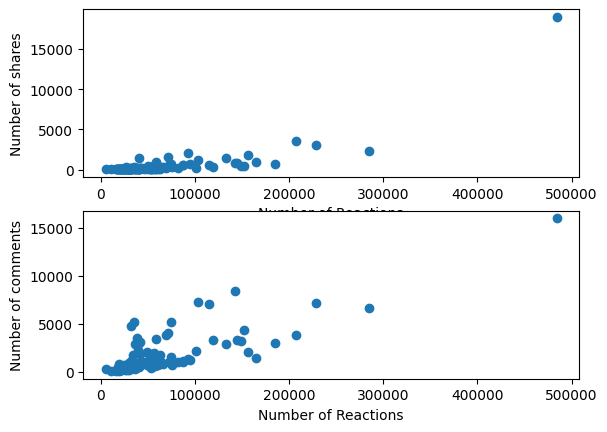

In [ ]:
X = raw_df['reaction_count']
y = raw_df['shares']
z = raw_df['comments']
plt.subplot(2,1,1)
plt.scatter(X, y)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of shares')

plt.subplot(2,1,2)
plt.scatter(X, z)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of comments')
plt.show()

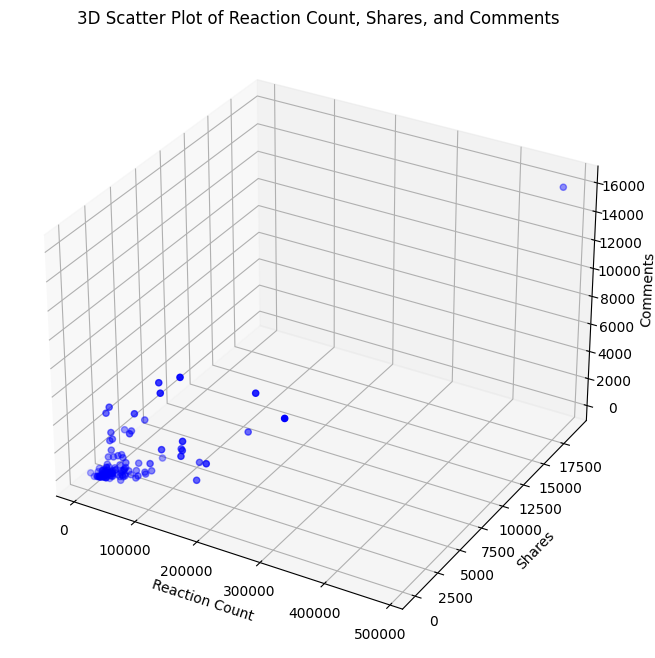

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'raw_df' is your DataFrame
x = raw_df['reaction_count']
y = raw_df['shares']
z = raw_df['comments']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, y, z, c='blue', marker='o')

ax.set_xlabel('Reaction Count')
ax.set_ylabel('Shares')
ax.set_zlabel('Comments')

plt.title('3D Scatter Plot of Reaction Count, Shares, and Comments')
plt.show()


In [ ]:
Y = np.array(x)
Y.reshape(120,1)
Y.shape

(120,)

In [ ]:
y = np.array(y)
z = np.array(z)
X = np.vstack((y, z)).T

array([[   15,   220],
       [  111,   649],
       [  295,  5200],
       [  718,  1200],
       [ 1000,  3400],
       [ 3600,  3800],
       [  315,   650],
       [   27,   130],
       [  233,  1900],
       [  803,  3300],
       [  139,   539],
       [  120,  1000],
       [   46,   231],
       [  114,   552],
       [   25,   128],
       [  404,  5200],
       [   11,    47],
       [  134,   583],
       [  567,  7100],
       [  107,   615],
       [  143,   662],
       [   48,   505],
       [  156,  2000],
       [  153,   869],
       [   62,   383],
       [  558,   959],
       [  170,  4800],
       [ 1400,  2900],
       [   43,   219],
       [  894,  1400],
       [  555,  1000],
       [   81,  1100],
       [  198,   934],
       [   70,   474],
       [  241,   967],
       [   60,   251],
       [   58,   578],
       [ 1600,  4000],
       [   92,   631],
       [  115,   569],
       [   74,   428],
       [   65,   267],
       [   59,   669],
       [   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [ ]:

from sklearn.linear_model import LinearRegression

my_model = LinearRegression()

my_model.fit(X_train, Y_train)



LinearRegression()

In [ ]:
y_pred = my_model.predict(X_test)

In [ ]:
my_model.score(X_train, Y_train)

0.7780664677213663